#### Load Library

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import language_tool_python
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textstat import flesch_reading_ease
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


####  Download NLTK Resources

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harshita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harshita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Load Data

In [3]:
df = pd.read_csv(r"AEStrain.csv") 
df.head(3)

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4


####  Clean Text

In [6]:
stop_words = set(stopwords.words('english'))

In [7]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Lowercase + remove punctuation
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

In [8]:
df['clean_text'] = df['full_text'].apply(clean_text)

#### Readability Score

In [9]:
df['readability'] = df['full_text'].apply(flesch_reading_ease)

#### Grammar Error Count

In [12]:
from spellchecker import SpellChecker

spell = SpellChecker()

def spelling_error_count(text):
    words = text.lower().split()
    misspelled = spell.unknown(words)
    return len(misspelled)

df['grammar_errors'] = df['full_text'].apply(spelling_error_count)


####  TF-IDF Features

In [13]:
tfidf = TfidfVectorizer(max_features=300)
X_tfidf = tfidf.fit_transform(df['clean_text'])


#### Combine Features

In [14]:
X = np.hstack((
    X_tfidf.toarray(),
    df[['readability', 'grammar_errors']].values
))
y = df['score'].astype(int)


#### Train-Test Split & Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

#### Evaluate Model

In [17]:
preds = model.predict(X_test)
rmse = mean_squared_error(y_test, preds)
print(f"✅ RMSE: {rmse:.4f}")


✅ RMSE: 0.5085


##### Visulization

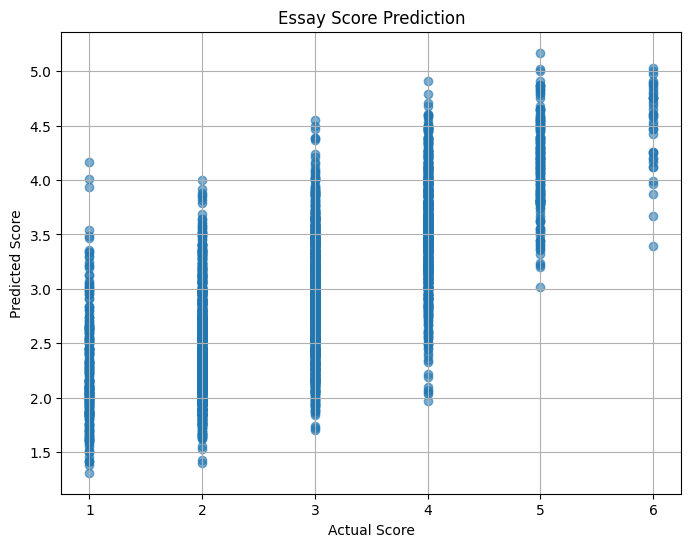

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.6)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Essay Score Prediction")
plt.grid(True)
plt.show()